## Predictive modeling of customer bookings


### Exploratory data analysis

First, I must explore the data in order to better understand what I have and the statistical properties of the dataset.

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
os.chdir('C:/Users/deela/Downloads/Data/Python')

In [3]:
os.getcwd()

'C:\\Users\\deela\\Downloads\\Data\\Python'

In [4]:
#loading the dataset

cwd = os.getcwd()

df = pd.read_csv(cwd + "\\customer_booking.csv", encoding="ISO-8859-1")

In [5]:
# displaying top rows

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [6]:
#checking the dataset summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, no null values found. but looks like some of these columns need to be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [7]:
#checking the the unique values in flight day

df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

 Mapping days of the week to numerical values to:
1. Make the 'flight_day' column compatible with machine learning models, as they require numerical inputs.
2. Preserve the natural order of the days (e.g., Monday before Tuesday).
3. Capture potential patterns in booking trends related to specific days of the week.

In [8]:
#Creating a dictionary to map day abbreviations to numerical values for easier analysis.

mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [9]:
#checking the unique values

df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [10]:
#For statistic summary of the entire dataset 

df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.


In [11]:
# Checking for missing values
print(df.isnull().sum())

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [12]:
#checking my first 5 rows

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


Handle Categorical Variables


Transforming categorical variables into numerical features using one-hot encoding to prepare the data for analysis.

In [13]:
#Use OneHotEncoder for nominal variables like sales_channel, trip_type.
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# One-hot encode `sales_channel`
sales_channel_encoded = pd.DataFrame(
    encoder.fit_transform(df[["sales_channel"]]),
    columns=encoder.get_feature_names_out(["sales_channel"])
)
df = pd.concat([df, sales_channel_encoded], axis=1)

# One-hot encode `trip_type`
trip_type_encoded = pd.DataFrame(
    encoder.fit_transform(df[["trip_type"]]),
    columns=encoder.get_feature_names_out(["trip_type"])
)
df = pd.concat([df, trip_type_encoded], axis=1)

# Drop original categorical columns if no longer needed
df = df.drop(["sales_channel", "trip_type", "route", "booking_origin"], axis=1)

In [14]:
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,1,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,7,0,0,0,5.62,0,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,6,0,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,1,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0


In [15]:
# Displaying our columns

print(df.columns)

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'sales_channel_Internet', 'sales_channel_Mobile',
       'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip'],
      dtype='object')


In [16]:
# Drop 'trip_type_nan' from the entire dataset

df = df.drop(columns=["trip_type_nan"], errors="ignore")  
# Used `errors='ignore'` to avoid errors if the column is already missing

In [17]:
#displaying the columns in the dataset

print(df.columns)


Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'sales_channel_Internet', 'sales_channel_Mobile',
       'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip'],
      dtype='object')


In [18]:
#Standardizing numerical columns and encoding categorical variables

from sklearn.preprocessing import StandardScaler

# Numerical columns to scale
numerical_columns = ["num_passengers", "purchase_lead", "length_of_stay", 
                     "flight_hour", "flight_duration"]

# Scale numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [19]:
#checking the first 5 rows

df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,0.400684,1.957530,-0.119353,-0.381764,6,1,0,0,-1.174175,0,1.0,0.0,0.0,0.0,1.0
1,-0.579559,0.299164,-0.089844,-1.120780,6,0,0,0,-1.174175,0,1.0,0.0,0.0,0.0,1.0
2,0.400684,1.747470,-0.030824,1.465775,3,1,1,0,-1.174175,0,1.0,0.0,0.0,0.0,1.0
3,-0.579559,0.122272,0.234761,-0.936026,6,0,0,1,-1.174175,0,1.0,0.0,0.0,0.0,1.0
4,0.400684,-0.187290,-0.030824,1.096267,3,1,0,1,-1.174175,0,1.0,0.0,0.0,0.0,1.0


In [20]:
#Checking booking_complete column for Anomalies

print(df["booking_complete"].unique())  # Check unique values
print(df["booking_complete"].isnull().sum())  # Check for missing values
print(df["booking_complete"].dtypes)  # Check data type

[0 1]
0
int64


In [21]:
#Dropping the nan values in the column

df = df.dropna(subset=["booking_complete"])


In [22]:
#checking booking complete column unique values

print(df["booking_complete"].unique()) 

[0 1]


In [23]:
# Extracting the booking_complete column to a variable named label

label = df['booking_complete']

In [24]:
# checking the distribution of values in label

label.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

Splitting the dataset into training and testing sets


In [25]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
print(X_train.isnull().sum())  # Check for missing values
print(X_test.isnull().sum())

print(np.isinf(X_train).sum())  # Check for infinite values
print(np.isinf(X_test).sum())

num_passengers            0
purchase_lead             0
length_of_stay            0
flight_hour               0
flight_day                0
wants_extra_baggage       0
wants_preferred_seat      0
wants_in_flight_meals     0
flight_duration           0
sales_channel_Internet    0
sales_channel_Mobile      0
trip_type_CircleTrip      0
trip_type_OneWay          0
trip_type_RoundTrip       0
dtype: int64
num_passengers            0
purchase_lead             0
length_of_stay            0
flight_hour               0
flight_day                0
wants_extra_baggage       0
wants_preferred_seat      0
wants_in_flight_meals     0
flight_duration           0
sales_channel_Internet    0
sales_channel_Mobile      0
trip_type_CircleTrip      0
trip_type_OneWay          0
trip_type_RoundTrip       0
dtype: int64
num_passengers            0
purchase_lead             0
length_of_stay            0
flight_hour               0
flight_day                0
wants_extra_baggage       0
wants_preferred_seat  

In [27]:
print(y_train.isnull().sum())  # Check for missing values
print(y_test.isnull().sum())

print(np.isinf(y_train).sum())  # Check for infinite values
print(np.isinf(y_test).sum())

0
0
0
0


In [28]:
# Fill missing values for all numeric columns

X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


In [29]:
print(X_train.isnull().sum())  # Check for missing values
print(X_test.isnull().sum())

print(np.isinf(X_train).sum())  # Check for infinite values
print(np.isinf(X_test).sum())

num_passengers            0
purchase_lead             0
length_of_stay            0
flight_hour               0
flight_day                0
wants_extra_baggage       0
wants_preferred_seat      0
wants_in_flight_meals     0
flight_duration           0
sales_channel_Internet    0
sales_channel_Mobile      0
trip_type_CircleTrip      0
trip_type_OneWay          0
trip_type_RoundTrip       0
dtype: int64
num_passengers            0
purchase_lead             0
length_of_stay            0
flight_hour               0
flight_day                0
wants_extra_baggage       0
wants_preferred_seat      0
wants_in_flight_meals     0
flight_duration           0
sales_channel_Internet    0
sales_channel_Mobile      0
trip_type_CircleTrip      0
trip_type_OneWay          0
trip_type_RoundTrip       0
dtype: int64
num_passengers            0
purchase_lead             0
length_of_stay            0
flight_hour               0
flight_day                0
wants_extra_baggage       0
wants_preferred_seat  

In [30]:
#checking the x_train and y_train shape

print(X_train.shape)
print(y_train.shape)


(40000, 14)
(40000,)


In [31]:
#checking the unique values and data type

print(y_train.unique())
print(y_train.dtypes)


[0 1]
int64


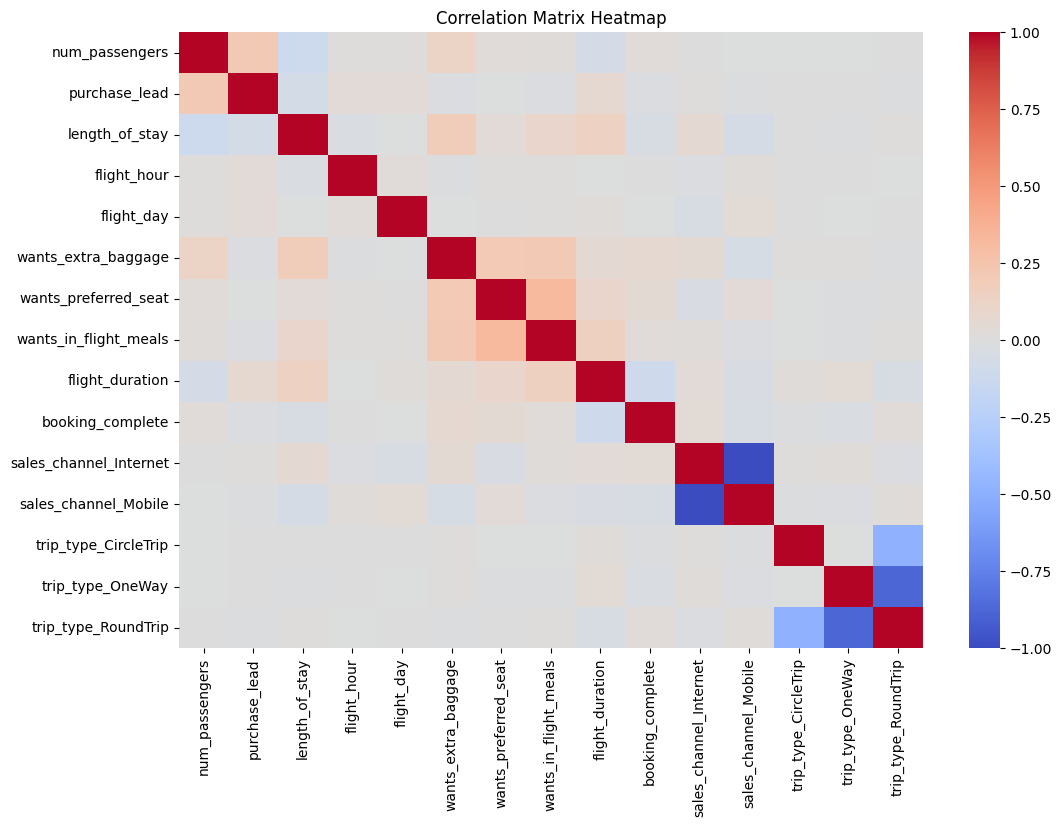

In [32]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [33]:
# Correlation of features with 'booking_complete'

target_corr = correlation_matrix["booking_complete"].sort_values(ascending=False)
print("Correlation with Target:\n", target_corr)


Correlation with Target:
 booking_complete          1.000000
wants_extra_baggage       0.068139
wants_preferred_seat      0.050116
sales_channel_Internet    0.041060
trip_type_RoundTrip       0.028226
wants_in_flight_meals     0.026511
num_passengers            0.024116
flight_hour               0.007127
flight_day               -0.006986
trip_type_CircleTrip     -0.014394
purchase_lead            -0.022131
trip_type_OneWay         -0.024240
sales_channel_Mobile     -0.041060
length_of_stay           -0.042408
flight_duration          -0.106266
Name: booking_complete, dtype: float64


Accuracy: 0.8497

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.44      0.06      0.10      1480

    accuracy                           0.85     10000
   macro avg       0.65      0.52      0.51     10000
weighted avg       0.80      0.85      0.80     10000


Confusion Matrix:
 [[8410  110]
 [1393   87]]


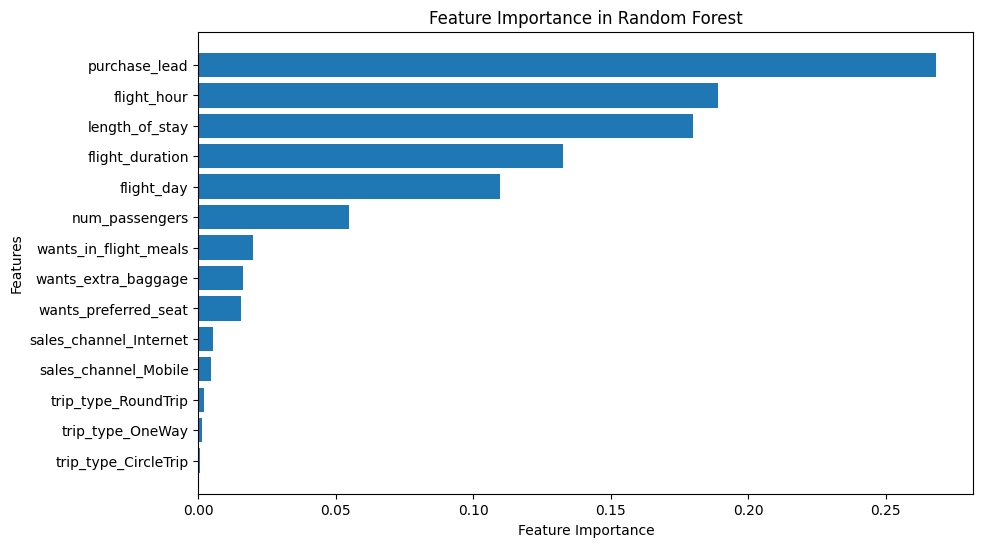

In [ ]:
# Training and evaluate using Random Forest Classifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Defining features and target
X = df.drop(columns=["booking_complete"])  # Features
y = df["booking_complete"]  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating the model
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Interpreting Feature Importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # To show the most important at the top
plt.show()


In [35]:
# Train and evaluate using Balanced Random Forest Classifier


from imblearn.ensemble import BalancedRandomForestClassifier

brf_model = BalancedRandomForestClassifier(sampling_strategy='auto', replacement=False, bootstrap=True, random_state=42)

brf_model.fit(X_train, y_train)  # Training the model


BalancedRandomForestClassifier(bootstrap=True, random_state=42,
                               replacement=False, sampling_strategy='auto')

In [36]:
# Predictions and evaluation

y_pred_brf = brf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_brf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_brf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_brf))


Accuracy: 0.6289

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.63      0.74      8520
           1       0.22      0.61      0.33      1480

    accuracy                           0.63     10000
   macro avg       0.56      0.62      0.54     10000
weighted avg       0.80      0.63      0.68     10000


Confusion Matrix:
 [[5380 3140]
 [ 571  909]]


In [37]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Grid Search

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the BalancedRandomForestClassifier with explicit parameters
brf_model = BalancedRandomForestClassifier(
    sampling_strategy='auto',
    random_state=42,
    replacement=False, 
    bootstrap=True 
)


In [38]:
# Performing Grid Search
grid_search = GridSearchCV(
    estimator=brf_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the Grid Search on training data
grid_search.fit(X_train, y_train)

# Retrieve the best model and parameters
best_brf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
y_pred_best_brf = best_brf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best_brf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_brf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_brf))


Accuracy: 0.6603

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77      8520
           1       0.24      0.61      0.35      1480

    accuracy                           0.66     10000
   macro avg       0.58      0.64      0.56     10000
weighted avg       0.81      0.66      0.71     10000


Confusion Matrix:
 [[5694 2826]
 [ 571  909]]


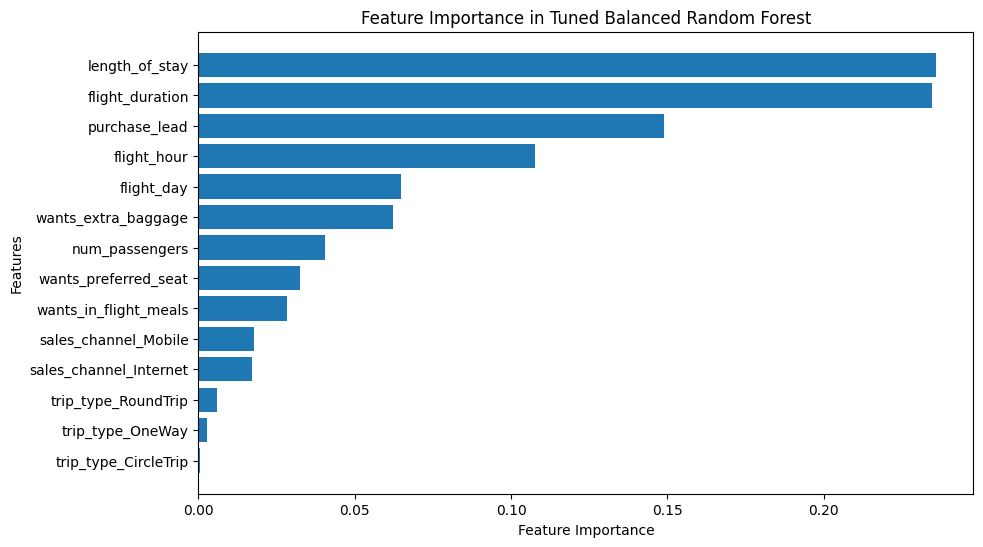

In [40]:
# Plot of feature importance in Balannced Random Forest

feature_importances = best_brf_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Tuned Balanced Random Forest")
plt.gca().invert_yaxis()
plt.show()


### Manually Balancing the Dataset to Address Class Imbalance

The dataset will be divided into majority and minority classes, with the majority class downsampled to match the minority size. This ensures balanced distribution and allows for tailored experimentation.

In [41]:
# Checking class distribution before balancing
print("Class Distribution Before Balancing:")
print(df["booking_complete"].value_counts())

Class Distribution Before Balancing:
booking_complete
0    42522
1     7478
Name: count, dtype: int64


In [42]:
# Sampling the majority class to balance the dataset
majority_class = df[df["booking_complete"] == 0].sample(n=8000, random_state=42)
minority_class = df[df["booking_complete"] == 1]

In [43]:
# Now we Combine the minority class with the sampled majority class
balanced_df = pd.concat([majority_class, minority_class], ignore_index=True)

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verifying the new class distribution
print("Class Distribution After Balancing:")
print(balanced_df["booking_complete"].value_counts())

Class Distribution After Balancing:
booking_complete
0    8000
1    7478
Name: count, dtype: int64


In [44]:
# Spliting the data into features and target
X_balanced = balanced_df.drop(columns=["booking_complete"])
y_balanced = balanced_df["booking_complete"]

# Spliting into train and test sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

In [45]:
# Trainig the Random Forest model
rf_model_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model_balanced.fit(X_train_balanced, y_train_balanced)

# Evaluating the model
y_pred_balanced = rf_model_balanced.predict(X_test_balanced)

# Metrics
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
classification_report_balanced = classification_report(y_test_balanced, y_pred_balanced)
confusion_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)

print("Accuracy After Balancing:", accuracy_balanced)
print("\nClassification Report After Balancing:\n", classification_report_balanced)
print("\nConfusion Matrix After Balancing:\n", confusion_matrix_balanced)

Accuracy After Balancing: 0.623062015503876

Classification Report After Balancing:
               precision    recall  f1-score   support

           0       0.64      0.65      0.64      1621
           1       0.61      0.60      0.60      1475

    accuracy                           0.62      3096
   macro avg       0.62      0.62      0.62      3096
weighted avg       0.62      0.62      0.62      3096


Confusion Matrix After Balancing:
 [[1047  574]
 [ 593  882]]


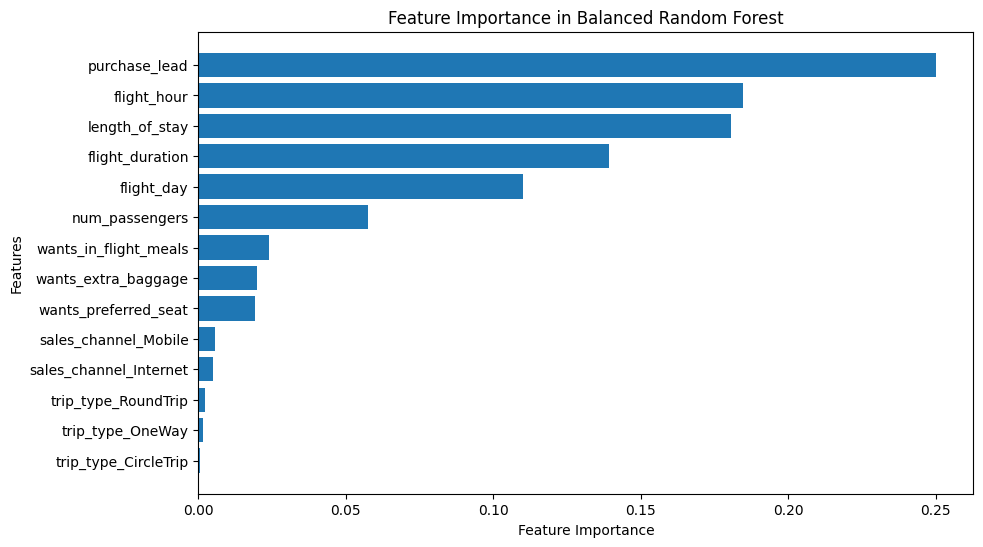

In [46]:
# Feature Importance
feature_importances_balanced = rf_model_balanced.feature_importances_
importance_df_balanced = pd.DataFrame({
    "Feature": X_balanced.columns,
    "Importance": feature_importances_balanced
}).sort_values(by="Importance", ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df_balanced["Feature"], importance_df_balanced["Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Balanced Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Computing metrics for the testing data
accuracy_balanced = round(accuracy_score(y_test_balanced, y_pred_balanced), 2)
precision_balanced = round(precision_score(y_test_balanced, y_pred_balanced), 2)
recall_balanced = round(recall_score(y_test_balanced, y_pred_balanced), 2)
specificity_balanced = round(recall_score(y_test_balanced, y_pred_balanced, pos_label=0), 2)
f1_balanced = round(f1_score(y_test_balanced, y_pred_balanced), 2)

# Print the metrics
print(f"Your results indicate the following for the testing data after balancing:")
print(f"* Accuracy: {accuracy_balanced}")
print(f"* Precision: {precision_balanced}")
print(f"* Recall (Sensitivity): {recall_balanced}")
print(f"* Specificity: {specificity_balanced}")
print(f"* F1-Score: {f1_balanced}")


Your results indicate the following for the testing data after balancing:
* Accuracy: 0.62
* Precision: 0.61
* Recall (Sensitivity): 0.6
* Specificity: 0.65
* F1-Score: 0.6


In [48]:
#print(X_train_smote.isnull().sum())

print(X_train_balanced.isnull().sum())
#print(X_test_balanced.isnull().sum())

num_passengers            0
purchase_lead             0
length_of_stay            0
flight_hour               0
flight_day                0
wants_extra_baggage       0
wants_preferred_seat      0
wants_in_flight_meals     0
flight_duration           0
sales_channel_Internet    0
sales_channel_Mobile      0
trip_type_CircleTrip      0
trip_type_OneWay          0
trip_type_RoundTrip       0
dtype: int64


In [49]:
#Filling the missing values with the mean of the column

X_train_balanced = X_train_balanced.fillna(X_train_balanced.mean())
X_test_balanced = X_test_balanced.fillna(X_test_balanced.mean())


In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, classification_report

smote = SMOTE(random_state=42)

# Applying SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train_balanced, y_train_balanced)

# Train Random Forest with class weights
rf_model_combined = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model_combined.fit(X_train_smote, y_train_smote)

# Evaluating the model
y_pred_combined = rf_model_combined.predict(X_test_balanced)
print("Classification Report (SMOTE + Weighted):")
print(classification_report(y_test_balanced, y_pred_combined))
print("ROC-AUC Score:", roc_auc_score(y_test_balanced, rf_model_combined.predict_proba(X_test_balanced)[:, 1]))


Classification Report (SMOTE + Weighted):
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1621
           1       0.60      0.60      0.60      1475

    accuracy                           0.62      3096
   macro avg       0.61      0.61      0.61      3096
weighted avg       0.62      0.62      0.62      3096

ROC-AUC Score: 0.6622417632973996


In [51]:
print("Classification Report (Tuned):")
print(classification_report(y_test_balanced, y_pred_combined))


Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1621
           1       0.60      0.60      0.60      1475

    accuracy                           0.62      3096
   macro avg       0.61      0.61      0.61      3096
weighted avg       0.62      0.62      0.62      3096



In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_balanced)


In [53]:
X_test_scaled = np.nan_to_num(X_test_scaled, nan=np.nanmean(X_test_scaled, axis=0))

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

logreg = LogisticRegression(class_weight="balanced", random_state=42)
logreg.fit(X_train_scaled, y_train_balanced)

y_pred_logreg = logreg.predict(X_test_scaled)
print("Classification Report (Logistic Regression):")
print(classification_report(y_test_balanced, y_pred_logreg))
print("ROC-AUC Score:", roc_auc_score(y_test_balanced, logreg.predict_proba(X_test_scaled)[:, 1]))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.61      0.56      0.58      1621
           1       0.56      0.60      0.58      1475

    accuracy                           0.58      3096
   macro avg       0.58      0.58      0.58      3096
weighted avg       0.58      0.58      0.58      3096

ROC-AUC Score: 0.607943203086607
